# **`Análise Exploratória dos dados`**

Problema de negócio, prever a curva de saturação da bateria.






In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline



In [131]:
#carregamento de dados do datalogger
datalog_base = pd.read_csv(r'/content/drive/MyDrive/CURSO EAD/PROGRAMACAO/PYTHON/CIENICA DE DADOS/ESTUDO DE CASO/BATTERY_LIFE/CONTROLADOR CO (120 DIAS)_cop.csv', sep = ',')


In [ ]:
datalog_base.head(10)

In [133]:
datalog_base = datalog_base.reset_index()
datalog_base = datalog_base.set_index('level_0')
datalog_base = datalog_base.drop(['level_1','level_2','level_3','level_4','Max Battery Volt.(V)','Max Charge Curr.(A)','Max Charge Power(W)','Charge Ah','Discharge KWh'], axis=1)
datalog_base.head(10)



,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
level_0,,,,,,
120.0,34.0,21.0,944.0,111.0,3.0,63.0
119.0,32.0,47.0,899.0,82.0,2.0,268.0
118.0,32.0,89.0,901.0,107.0,2.0,968.0
117.0,38.0,93.0,1070.0,100.0,2.0,723.0
116.0,36.0,69.0,1005.0,125.0,3.0,453.0
115.0,38.0,55.0,1062.0,115.0,3.0,152.0
114.0,5.0,40.0,146.0,21.0,0.0,564.0
113.0,44.0,72.0,1238.0,133.0,3.0,658.0
112.0,32.0,16.0,887.0,107.0,2.0,974.0


In [134]:
datalog_base.shape

(121, 6)

In [135]:
datalog_base.isnull().sum() # avaliar valores nulos e soma-lo " indenficar informações nulos para excluir.(Valores missing ou valores ausentes)"

Days Ago                  62
Min Battery Volt.(V)      62
Max Discharge Curr.(A)    62
Max Discharge Power(W)    62
Discharge Ah              62
Charge KWh                62
dtype: int64

In [136]:
# Tratar os valores missing "Eliminá-los" (neste caso não existe valores ausentes conforme informado na análise exploratória de dados, então não é preciso elimina-los)
datalog_base.dropna(inplace=True)
datalog_base.shape

(59, 6)

In [137]:
datalog_base.nunique() #Nunique() apresenta o numero todad de VALORES UNICOS em cada coluna do dataframe.

Days Ago                  27
Min Battery Volt.(V)      40
Max Discharge Curr.(A)    58
Max Discharge Power(W)    49
Discharge Ah               5
Charge KWh                56
dtype: int64

In [138]:
datalog_base.describe()# realização de informações estatítica para comparação média com a mediana.


,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,27.983051,51.118644,786.881356,89.237288,1.983051,399.898305
std,10.849267,28.656157,299.664933,44.740762,1.224626,321.974977
min,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,24.500000,26.000000,689.000000,58.000000,1.000000,93.500000
50%,32.000000,53.000000,887.000000,103.000000,2.000000,372.000000
75%,35.000000,77.000000,995.000000,122.000000,3.000000,692.000000
max,44.000000,95.000000,1238.000000,154.000000,4.000000,977.000000


In [ ]:
datalog_base.duplicated().sum # é a soma total de dados duplicados.

In [ ]:
datalog_base['Charge KWh'].value_counts()# Mostra quais valores são unicos.

In [ ]:
datalog_base.astype('float') # Convertendo para valores int64 para float

In [145]:
#Calcular a correlação
datalog_corr = datalog_base.corr()
datalog_corr

,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
Days Ago,1.000000,0.003778,0.998783,0.733346,0.672177,0.217403
Min Battery Volt.(V),0.003778,1.000000,0.033457,0.002049,0.015289,-0.159282
Max Discharge Curr.(A),0.998783,0.033457,1.000000,0.745161,0.685558,0.215490
Max Discharge Power(W),0.733346,0.002049,0.745161,1.000000,0.968022,0.289614
Discharge Ah,0.672177,0.015289,0.685558,0.968022,1.000000,0.086924
Charge KWh,0.217403,-0.159282,0.215490,0.289614,0.086924,1.000000


<Axes: >

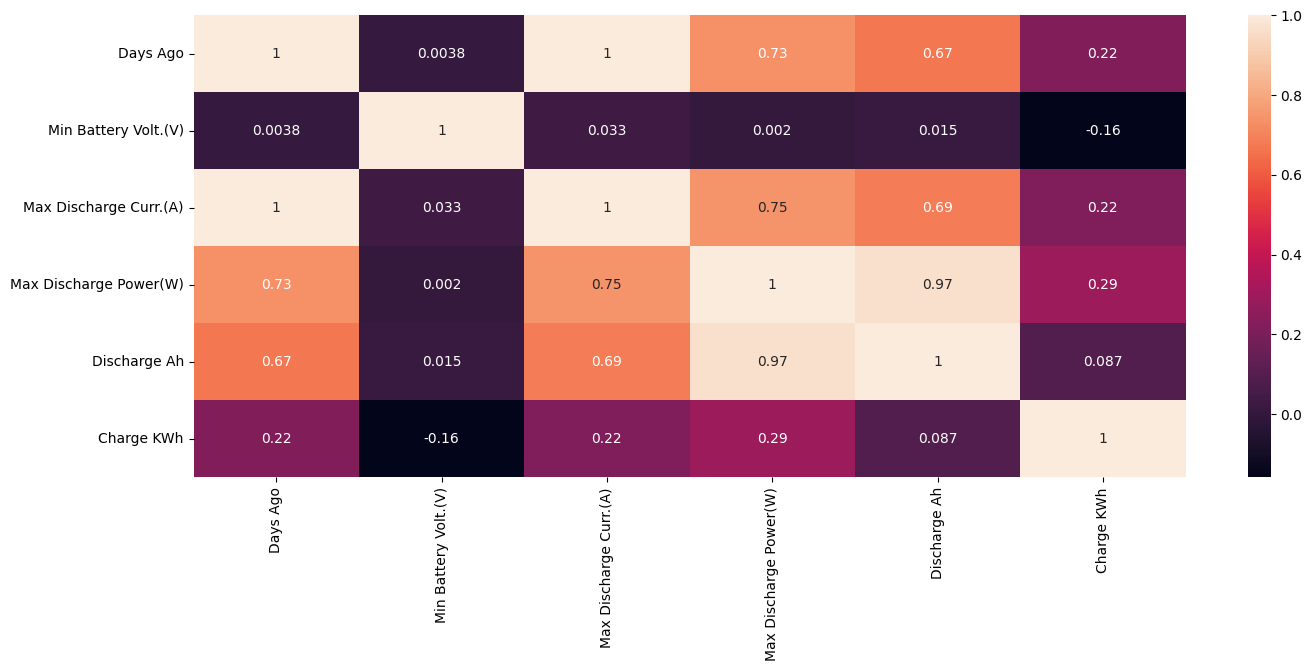

In [146]:
# Usando o método heatmap do seaborn

plt.figure(figsize=(16,6))
sns.heatmap(data=datalog_corr, annot=True)

In [147]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 24.2 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=352322 sha256=7c03373648381ecd48ea815e44ce4a212c4adfca25b9c31682bea7e432c58fb4
  Stored in directory: /tmp/pip-ephem-wheel-cache-pbtzk7x7/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 

In [148]:
from pandas_profiling import ProfileReport

<ipython-input-148-e2a33329b6f0>:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [149]:
profiling = ProfileReport(datalog_base,title= 'Relatório - Pandas Profiling', html={'style':{'full_width':True}} )

In [152]:
profiling
# Traducao das colunas do dataset
#  0   Days Ago / dias atrás
#  1   Min Battery Volt.(V)  /  Volt Mínimo Da Bateria (V)
#  2   Max Discharge Curr.(A) / Corrente de descarga máxima (A)
#  3   Max Discharge Power(W) / Potência máxima de descarga (W)
#  4   Discharge Ah / 4 Descarga Ah
#  5   Charge KWh / Carga KWh


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [153]:
#Importar ploty
import plotly.express as px

In [155]:
# Correlação entre Quantidade_ciclo x Carg
fig = px.scatter(datalog_base,x='Days Ago',y='Charge KWh')
fig.show()

In [156]:
# Correlação entre descarga max(P) x Carga(Kw/h)
fig = px.scatter(datalog_base,x='Max Discharge Power(W)',y='Charge KWh')
fig.show()

In [157]:
datalog_base['Charge KWh'].describe()

count     59.000000
mean     399.898305
std      321.974977
min        0.000000
25%       93.500000
50%      372.000000
75%      692.000000
max      977.000000
Name: Charge KWh, dtype: float64

In [158]:
import plotly.figure_factory as ff


In [159]:
labels = ['Distribuição de variável  Max Discarga (Killo_watts)']
fig = ff.create_distplot([datalog_base['Charge KWh']],labels, bin_size= .2)
fig.show()

In [160]:
from scipy import stats
stats.skew(datalog_14300['Charge KWh'])

-0.03037922472414669

In [161]:
#Histograma da variável Charge Kwh
fig = px.histogram(datalog_base, x= "Max Discharge Curr.(A)", nbins=50, opacity=0.50)
fig.show()

In [162]:
#Visualizando outliers na Variável Carga
import plotly.express as px

fig = px.box(datalog_base, y='Charge KWh')
fig.update_layout(width= 800, height= 800)
fig.show()

In [163]:
datalog_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Days Ago to Charge KWh
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days Ago                6 non-null      float64
 1   Min Battery Volt.(V)    6 non-null      float64
 2   Max Discharge Curr.(A)  6 non-null      float64
 3   Max Discharge Power(W)  6 non-null      float64
 4   Discharge Ah            6 non-null      float64
 5   Charge KWh              6 non-null      float64
dtypes: float64(6)
memory usage: 508.0+ bytes


In [164]:
# estatistica descritivas de outras variáveis
datalog_base[['Min Battery Volt.(V)','Min Battery Volt.(V)','Max Discharge Curr.(A)','Max Discharge Power(W)','Discharge Ah']].describe()

,Min Battery Volt.(V),Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,51.118644,51.118644,786.881356,89.237288,1.983051
std,28.656157,28.656157,299.664933,44.740762,1.224626
min,4.000000,4.000000,1.000000,0.000000,0.000000
25%,26.000000,26.000000,689.000000,58.000000,1.000000
50%,53.000000,53.000000,887.000000,103.000000,2.000000
75%,77.000000,77.000000,995.000000,122.000000,3.000000
max,95.000000,95.000000,1238.000000,154.000000,4.000000


# **Pré_Processamento de dados do dataset da bateria**
Problema de negócio, prever a curva de saturação da bateria

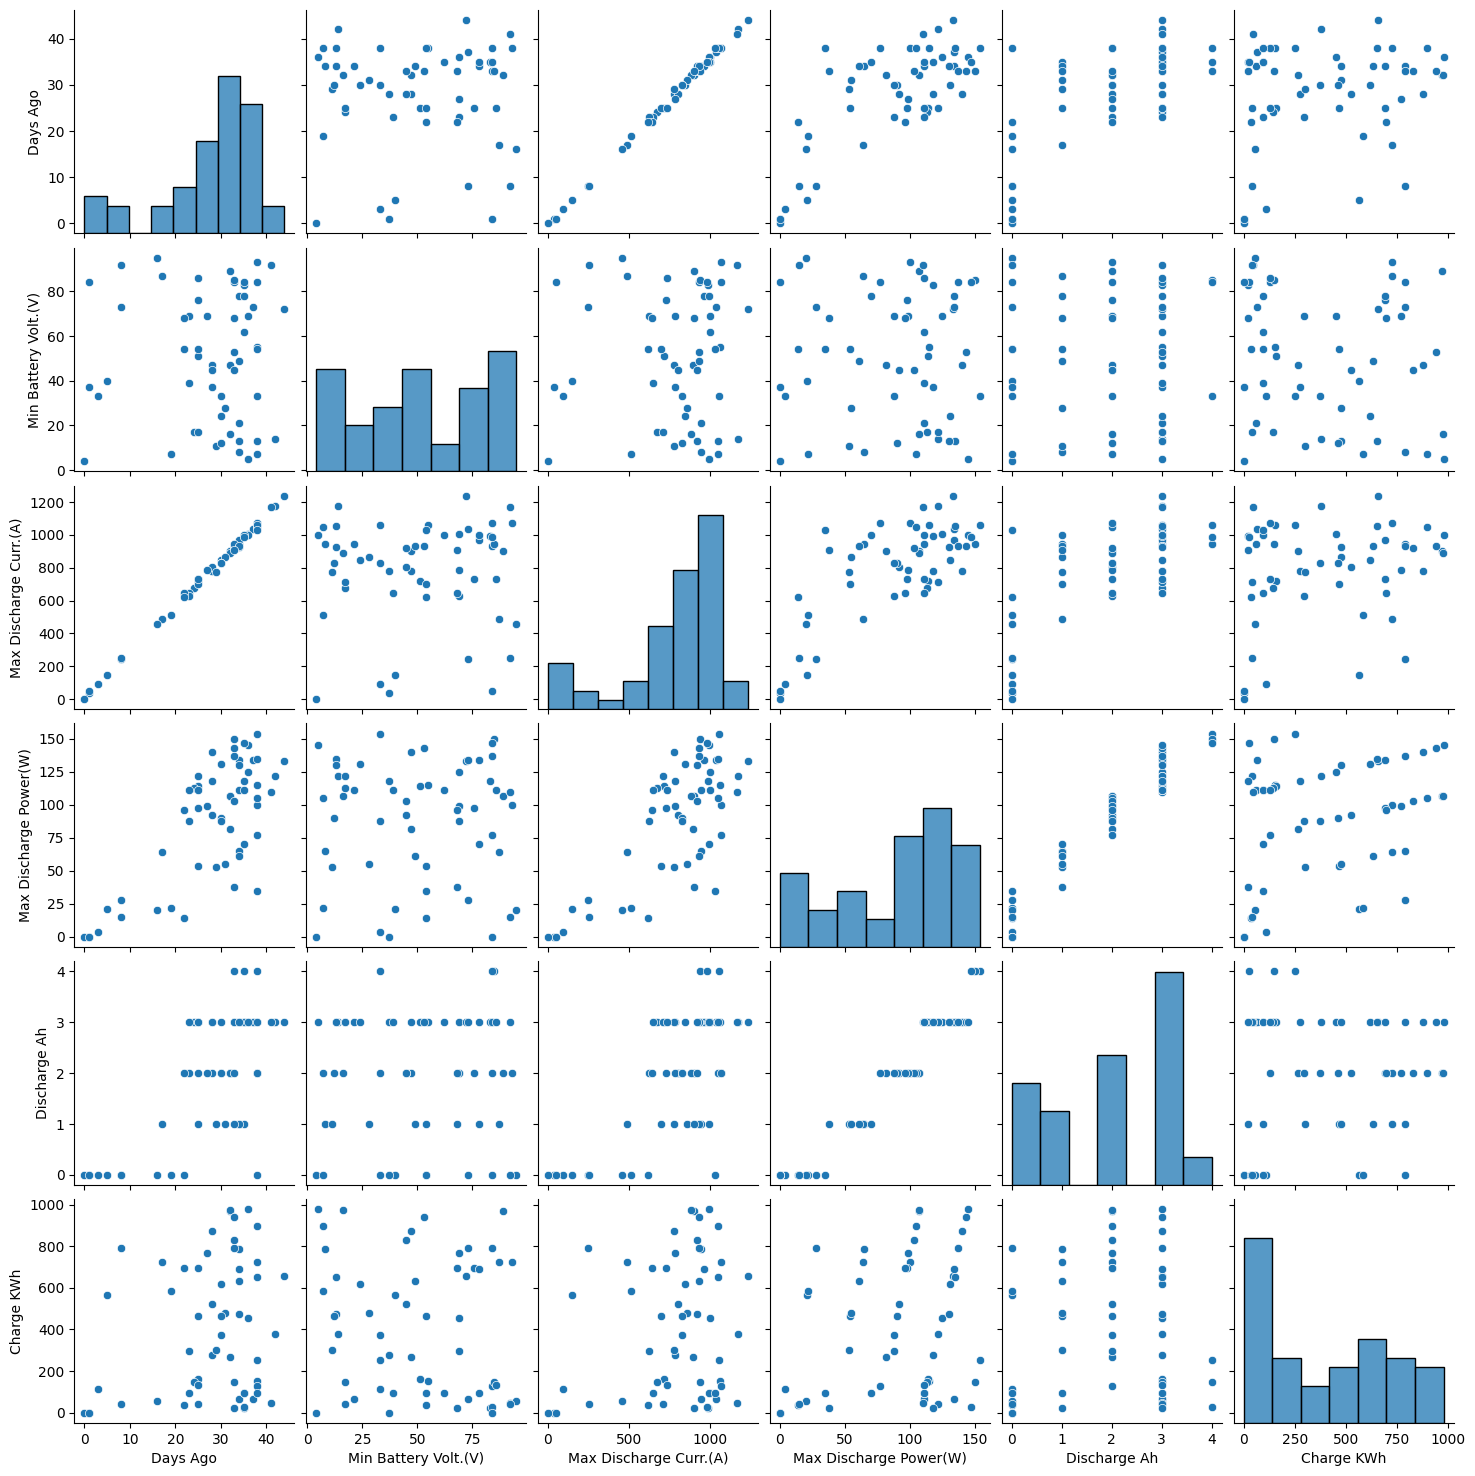

In [165]:
sns.pairplot(datalog_base)

In [166]:
datalog_base.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 59 entries, 120.0 to 62.0
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days Ago                59 non-null     float64
 1   Min Battery Volt.(V)    59 non-null     float64
 2   Max Discharge Curr.(A)  59 non-null     float64
 3   Max Discharge Power(W)  59 non-null     float64
 4   Discharge Ah            59 non-null     float64
 5   Charge KWh              59 non-null     float64
dtypes: float64(6)
memory usage: 5.3 KB


In [167]:
# Coletando x e y
# Usaremos como variáveis explanatórias somente as 4 variáveis mais relevantes
X = datalog_base[['Charge KWh','Max Discharge Power(W)','Max Discharge Curr.(A)']]
y = datalog_base['Days Ago'].values

In [168]:
#Realizar a separação dos dados dataset entre 80% treino e e 20% para validação.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# **Criação da Máquina preditiva**
#Criando um modelo de maquina preditiva de regressão múltipla



In [169]:
#Construindo o modelo de Regreção mútipla
model = LinearRegression()


In [170]:
#Treina o modelo
model_multi = model.fit(X_train, y_train)

In [171]:
# Novas Previsões
prevision = model_multi.predict(X_test)
prevision

array([32.99605622, 23.54663889, -0.60599468, 41.94233444, 36.79911596,
       34.72978294, 37.54631734, 17.07585025, 22.5475437 , 35.2608156 ,
       35.94766434, 32.70730601])

## **Avaliando o desempenho da máquina preditiva **

In [172]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test,prevision )

0.996878870000148

In [174]:
# Compara valor real e valor predito
saturacao_predita = pd.DataFrame({'Real': y_test.flatten(), 'Saturacao':prevision.flatten()})
saturacao_predita.sample(5)

,Real,Saturacao
11,34.0,32.707306
8,23.0,22.547544
5,35.0,34.729783
3,41.0,41.942334
2,0.0,-0.605995


In [175]:
# Evaluate model - Avaliação da Acurácia do Modelo
print('Acurácia: %.2f' % (model.score(X_test, y_test)*100), '%' )

Acurácia: 99.69 %


<Figure size 640x480 with 0 Axes>

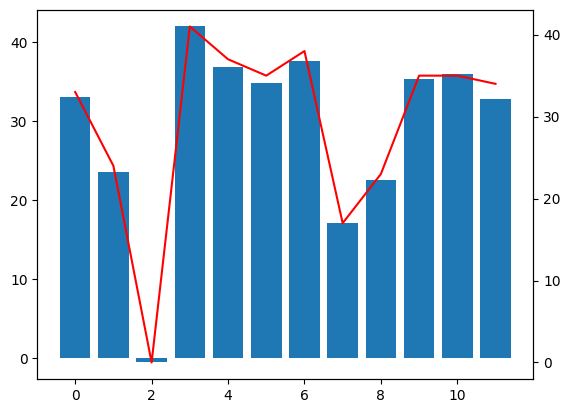

In [178]:
plt.figure()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(saturacao_predita.index,saturacao_predita['Saturacao'])
plt.xticks(rotation=90)
ax2.plot(saturacao_predita.index,saturacao_predita['Real'],color='r')
plt.show()

# Decorrente a correlação entre ciclos de cargas mais as variáveis
Charge KWh
Max Discharge Power(W)
Max Discharge Curr.(A)
Pode se dizer que a bateria saturou por alguma ocasião no ciclo 02;
Havendo uma previsão de falha no sétimo ciclo, sendo que uma ação corretiva foi realizada para conter a descarga profunda da bateria.